# **THE SPARKS FOUNDATION - INTERNSHIP**

Graduate Rotational Internship Program

> ### **Data Science & Business Analytics**

This Notebook deals with the prediction of Iris dataset using Unsupervised ML.

## **Task -1**


> ## **Predict *Iris Dataset* Using Unsupervised ML** 
***
> ## Objective
* Predict the optimum number of clusters and represent it visually.
***
> ## About The Data
* Iris data contains 150 rows and 6 columns including Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and Species. This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant (Iris-setosa, Iris-versicolor, and Iris-virginica).
* Data source: [Link](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view)
* Data Format: .csv


### **Intern - Swati Gulati**


### Unsupervised Learning

* In this, the machine learning algorithm learns from **Unlabeled Data.**
* **Unlabeled data -** It is a designation for **pieces of data that have not been tagged with labels identifying characteristics, properties ,or classifications.** Unlabeled data is typically used in various forms of machine learning.

> There are two types of Unsupervised Learning:-
1. **Clustering -** It is an unsupervised task that involves grouping similar data points ,and is also known as a **cluster.**
**Algorithms -** *K-Means Clustering & Hierarchical Clustering*
2. **Association -** It is an unsupervised task that is used to find an important relationship between the data points.
**Algorithms -** *Apriori & Eclat*

**K-Means Clustering**

* K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
* In other words, the **K-means algorithm identifies k number of centroids,** and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
* The *means* in the K-means refers to averaging of the data; that is, finding the centroid (arithmetic mean of the cluster).

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans          #K-Means Clustering

1. Data Collection & Pre-Processing

In [ ]:
# Read the data
data = pd.read_csv("/content/Iris.csv - Iris.csv")

In [ ]:
# View data (First 5 and last 5 rows)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


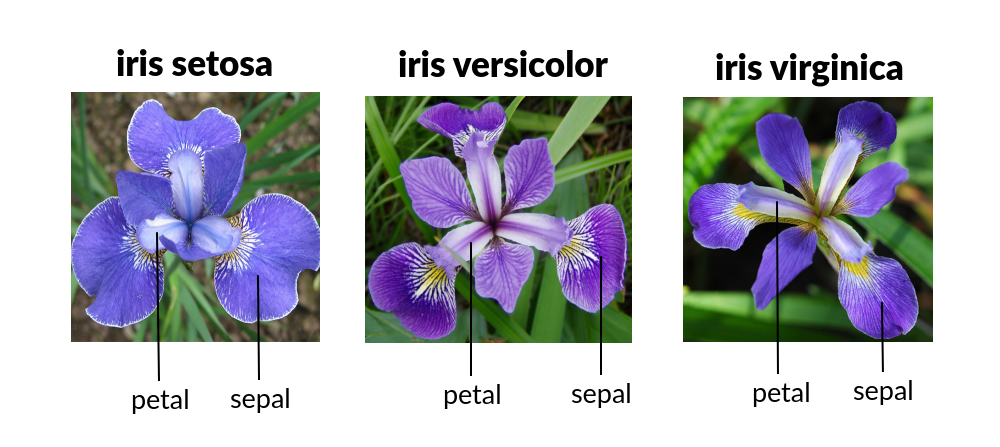

In [ ]:
# View rows and columns
data.shape

(150, 6)

In [ ]:
# Getting some basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Checking number of missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data does not contain any missing values.

In [ ]:
# Getting statistical measures of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Drop un-necessary column
# axis=0 (ROWS) & axis=1 (COLUMNS)
data.drop('Id', axis=1, inplace=True)

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Correlation

In [ ]:
correlation = data.corr()

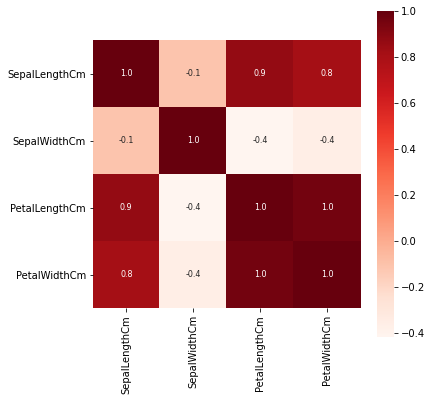

In [ ]:
#Constructing a heatmap to understand the values
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, fmt='.1f', cbar=True, square=True, annot=True,  cmap='Reds', annot_kws={'size':8})

Conclusion:

* PetalLengthCm & PetalWidthCm are highly (strongly) correlated to each other -> 1.0
* SepalLengthCm is positively correlated to PetalLengthCm & PetalWidthCm -> 0.9 & 0.8 resp.
* SepalLengthCm & SepalWidthCm are negatively correlated to each other -> -0.1
* SepalWidthCm is highly negatively correlated to PetalLengthCm & PetalWidthCm -> -0.4

In [ ]:
# from pandas_profiling import ProfileReport      (Generate EDA Report)
# profile= ProfileReport(data)
# profile.to_file(output_file="Iris-data.html")

2. Visualization

In [ ]:
#Frequency distribution of species"
data.value_counts('Species')

Species
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
dtype: int64

In [ ]:
# .loc[] - is primarily label based, but may also be used with a boolean array.
iris_setosa=data.loc[data["Species"]=="Iris-setosa"]
iris_virginica=data.loc[data["Species"]=="Iris-virginica"]
iris_versicolor=data.loc[data["Species"]=="Iris-versicolor"]

> Distribution Plot
* Plot each flower to a histogram

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

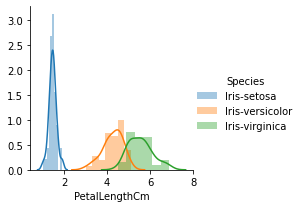

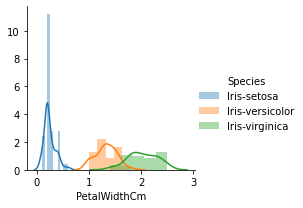

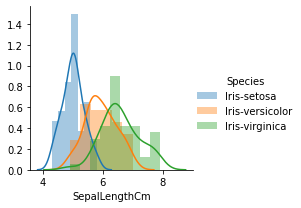

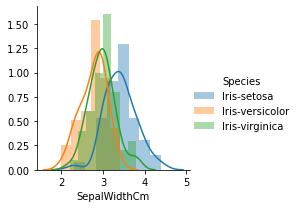

In [ ]:
# sns.FacetGrid() - FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.
# .map() - It returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)
# .add_legend() - only the title of the legend is displaying.
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

> Violin Plot

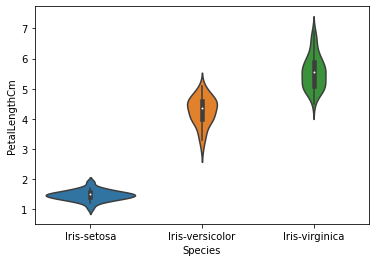

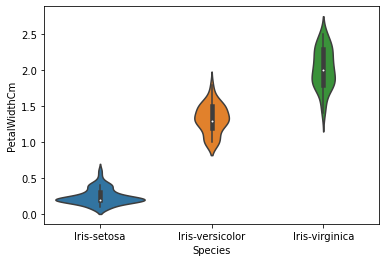

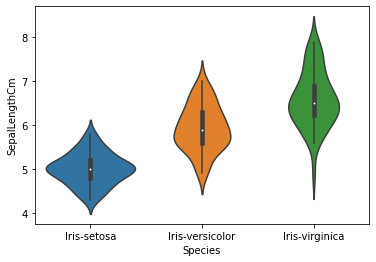

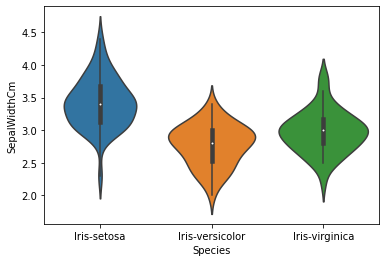

In [ ]:
# sns.violinplot() - Violin plots are used to visualize data distributions, displaying the range, median, and distribution of the data.
sns.violinplot(x="Species",y="PetalLengthCm",data=data)
plt.show()
sns.violinplot(x="Species",y="PetalWidthCm",data=data)
plt.show()
sns.violinplot(x="Species",y="SepalLengthCm",data=data)
plt.show()
sns.violinplot(x="Species",y="SepalWidthCm",data=data)
plt.show()

3. K-Means Clustering Model

* Train The Model



In [ ]:
# select all four features (sepal length, sepal width, petal length, and petal width) of the dataset
# column index (0,1,2,3)
x = data.iloc[:, [0,1,2,3]].values

**Elbow Method**

* The elbow method runs **k-means clustering on the dataset for a range of values for k (say from 1-10)** and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.
* It is **designed to help find the optimal number of clusters in a dataset.** So let’s use this method to calculate the optimum value of k and plot a graph between the number of clusters and the corresponding error value.

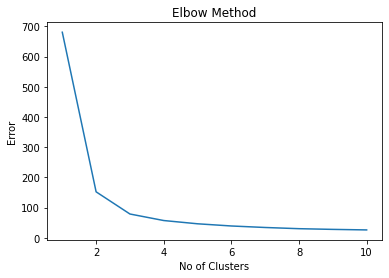

In [ ]:
# KMeans() - k-means clustering algorithm attempts to split a given anonymous data set (a set containing no information as to class identity) into a fixed number (k) of clusters. Initially k number of so called centroids are chosen.
Error =[]
for i in range(1, 11):                    #1,2,3,4,5,6,7,8,9,10
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.show()

You can clearly see why it is called **The elbow method** from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **'3'**.

In [ ]:
kmeans = KMeans(n_clusters=3)            # 0,1,2
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

# .cluster_centers_ - returns the coordinates of the centers 
kmeans.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

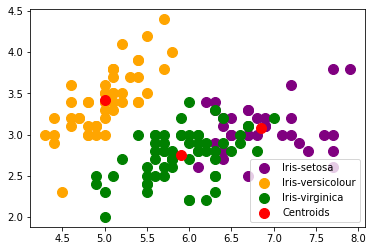

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()